In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf

In [45]:
import numpy as np
import pandas as pd
import glob #if you want to read files from global invironment

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [295]:
train_set_y_orig = pd.read_csv("../output_data/CNN_expression_output_mean_apex_inflorescence_21d_AGI.csv")


In [245]:
train_set_y_positive = pd.read_csv("../output_data/CNN_expression_output_positive_cntr.csv")


In [296]:
type(train_set_y_orig)

pandas.core.frame.DataFrame

In [297]:
train_set_y_orig.shape

(21821, 2)

In [298]:
train_set_y_positive.shape

(30821, 2)

In [299]:
train_set_y_orig.head(3)

AGI  mean_apex_inflorescence_21d
0  AT1G01010                            0
1  AT1G01020                            1
2  AT1G01030                            0

In [300]:
train_set_y_positive.head(3)

AGI  output
0  AT1G01010       1
1  AT1G01040       1
2  AT1G01110       1

In [301]:

train_set_y_positive_subset = pd.merge(left=train_set_y_orig, right=train_set_y_positive, how='outer', left_on='AGI', right_on='AGI')

In [302]:
print(train_set_y_positive_subset.shape)
train_set_y_positive_subset.head(3)


(30821, 3)


AGI  mean_apex_inflorescence_21d  output
0  AT1G01010                            0       1
1  AT1G01020                            1       1
2  AT1G01020                            1       1

In [304]:
train_set_y_positive_subset[ pd.isnull(train_set_y_positive_subset.mean_apex_inflorescence_21d) ]

Empty DataFrame
Columns: [AGI, mean_apex_inflorescence_21d, output]
Index: []

In [308]:
train_set_y_positive_subset[train_set_y_positive_subset.output == 0]

AGI  mean_apex_inflorescence_21d  output
10220  AT2G01008                            1       0
10221  AT2G01008                            1       0

In [51]:
#test = train_set_y_orig.sample(n = 2000)
#np.array(test.AGI)

# set a seed for sample’s random number generator using the random_state argument
# train_set_y_orig.sample(n = 2000, random_state=2)


In [52]:
file_names=[s + ".csv" for s in np.array(train_set_y_orig.AGI)]

In [53]:
path = "../output_data/CNN_input_matrix_df_bin_100bp/"

file_list = [path + s for s in file_names]


#file_list = (path + file_names)
print(file_list[0:5])

['../output_data/CNN_input_matrix_df_bin_100bp/AT1G01010.csv', '../output_data/CNN_input_matrix_df_bin_100bp/AT1G01020.csv', '../output_data/CNN_input_matrix_df_bin_100bp/AT1G01030.csv', '../output_data/CNN_input_matrix_df_bin_100bp/AT1G01040.csv', '../output_data/CNN_input_matrix_df_bin_100bp/AT1G01060.csv']


In [54]:
dfs=np.array([pd.read_csv(fp).values for fp in file_list])

In [55]:
import time
start_time = time.time()


dfs_fl64=np.array([pd.read_csv(fp).values for fp in file_list])

def main():
    print("--- %s seconds ---" % (time.time() - start_time))
    print("--- %.4f seconds ---" % (time.time() - start_time))
main()

--- 78.37865400314331 seconds ---
--- 78.3818 seconds ---


In [56]:
import time
start_time = time.time()


dfs_fl32=np.float32([pd.read_csv(fp).values for fp in file_list])

def main():
    print("--- %s seconds ---" % (time.time() - start_time))
    print("--- %.4f seconds ---" % (time.time() - start_time))
main()

--- 76.20502281188965 seconds ---
--- 76.2051 seconds ---


In [57]:
dfs_fl32.shape

(21821, 872, 15)

In [58]:
dfs.shape

(21821, 872, 15)

In [59]:
# Define training set
Y_train = (np.array(train_set_y_orig['mean_apex inflorescence_21d'])).reshape(train_set_y_orig['mean_apex inflorescence_21d'].shape[0], 1)
X_train = dfs.reshape((train_set_y_orig.shape[0]), 872, 15, 1)

In [187]:
X_train_norm[1]

<function ndarray.mean>

In [67]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))

#x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2)
#next time set the seed
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=11) #set the seed by "random_state=11"

print ("number of training examples = " + str(x_train.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))


number of training examples = 21821
X_train shape: (21821, 872, 15, 1)
Y_train shape: (21821, 1)
number of training examples = 17456
x_train shape: (17456, 872, 15, 1)
y_train shape: (17456, 1)


In [68]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
#model.add(MaxPooling2D(pool_size=(1,100)))
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
#
#model.add(Dense(200, activation='relu',
#              kernel_regularizer=regularizers.l2(0.01),
#              activity_regularizer=regularizers.l1(0.01)))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          
# model.add(Flatten())
# model.add(Dense(32*2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear'))

         

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [69]:
history = model.fit(x_train, y_train, epochs=1, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/1
13964/13964 [==============================] - 9s 638us/step - loss: 0.7212 - acc: 0.5412 - val_loss: 0.6833 - val_acc: 0.5556


In [70]:
history = model.fit(x_train, y_train, epochs=100, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/100
13964/13964 [==============================] - 4s 306us/step - loss: 0.6569 - acc: 0.6126 - val_loss: 0.6910 - val_acc: 0.5421
Epoch 2/100
13964/13964 [==============================] - 4s 292us/step - loss: 0.6033 - acc: 0.6733 - val_loss: 0.7075 - val_acc: 0.5570
Epoch 3/100
13964/13964 [==============================] - 4s 316us/step - loss: 0.5202 - acc: 0.7387 - val_loss: 0.7720 - val_acc: 0.5730
Epoch 4/100
13964/13964 [==============================] - 5s 326us/step - loss: 0.4134 - acc: 0.8031 - val_loss: 0.9377 - val_acc: 0.5530
Epoch 5/100
13964/13964 [==============================] - 4s 283us/step - loss: 0.2959 - acc: 0.8725 - val_loss: 1.1347 - val_acc: 0.5553
Epoch 6/100
13964/13964 [==============================] - 4s 304us/step - loss: 0.1963 - acc: 0.9220 - val_loss: 1.4942 - val_acc: 0.5484
Epoch 7/100
13964/13964 [==============================] - 4s 286us/step - loss: 0.1358 - acc: 0.9471 - val_loss: 1.6

In [80]:
history.history

{'val_loss': [0.6909976564049038,
  0.7074657998134181,
  0.7719720879917429,
  0.9376857975094589,
  1.1346531436615384,
  1.4942200941216086,
  1.6159422136117776,
  2.02228879187798,
  2.1048588328072024,
  2.2099192709857247,
  2.5289943483140735,
  2.5257896742434642,
  2.6554509972105866,
  2.6831945542071147,
  2.8765030667817335,
  2.8044476149964304,
  2.920370716746696,
  2.877744160703504,
  2.859874385055944,
  2.9360614111060266,
  2.969236276813389,
  3.224167041625627,
  3.181457293675391,
  3.207309184615145,
  3.0257164675482087,
  3.187407258859615,
  3.4006374193075937,
  3.056811514725527,
  2.899559951729791,
  3.522192235528262,
  3.233845608635354,
  3.406582703705096,
  3.3468711037542946,
  3.447654874873735,
  3.249659851603082,
  3.623157183192713,
  3.5797248064174414,
  3.410036975302374,
  3.478840146994673,
  3.2931634340635827,
  3.8001140526752972,
  3.796648680139653,
  3.680654452838439,
  3.780894875389877,
  3.8017704314792278,
  3.6005305263458114,

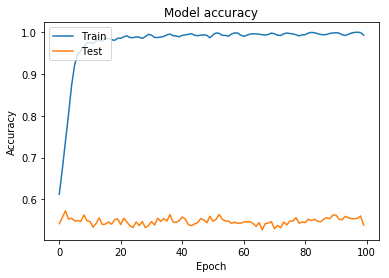

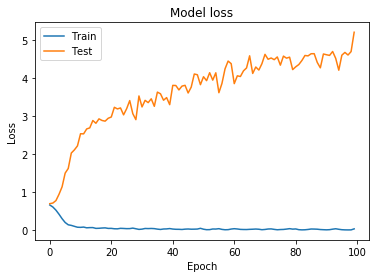

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [243]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(MaxPooling2D(pool_size=(1,5)))
model.add(Conv2D(filters=16, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 3, 1), use_bias=True))
#model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
#model.add(Dense(200, activation='relu'))
#
model.add(Dense(16, activation='relu',
              kernel_regularizer=regularizers.l1(0.0001),
              activity_regularizer=regularizers.l1(0.0001)))
#model.add(Dense(8, activation='relu',
#              kernel_regularizer=regularizers.l1(0.0001),
#              activity_regularizer=regularizers.l1(0.0001)))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          
# model.add(Flatten())
# model.add(Dense(32*2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear'))

         

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [244]:
history_norm = model.fit(x_train_norm, y_train, epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 7s 532us/step - loss: 0.6921 - acc: 0.5594 - val_loss: 0.6810 - val_acc: 0.5759
Epoch 2/15
13964/13964 [==============================] - 4s 309us/step - loss: 0.6690 - acc: 0.6046 - val_loss: 0.6781 - val_acc: 0.5868
Epoch 3/15
13964/13964 [==============================] - 4s 284us/step - loss: 0.6492 - acc: 0.6359 - val_loss: 0.6799 - val_acc: 0.5745
Epoch 4/15
13964/13964 [==============================] - 4s 299us/step - loss: 0.6312 - acc: 0.6601 - val_loss: 0.6886 - val_acc: 0.5753
Epoch 5/15
13964/13964 [==============================] - 5s 360us/step - loss: 0.6096 - acc: 0.6820 - val_loss: 0.6996 - val_acc: 0.5713
Epoch 6/15
13964/13964 [==============================] - 5s 333us/step - loss: 0.5902 - acc: 0.6975 - val_loss: 0.7184 - val_acc: 0.5670
Epoch 7/15
13964/13964 [==============================] - 4s 310us/step - loss: 0.5688 - acc: 0.7176 - val_loss: 0.7235 - v

In [240]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
#model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])
history_norm = model.fit(x_train, y_train, callbacks=[early_stopping], epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 6s 438us/step - loss: 0.9127 - acc: 0.5768 - val_loss: 0.8842 - val_acc: 0.5435
Epoch 2/15
13964/13964 [==============================] - 4s 264us/step - loss: 0.7070 - acc: 0.5495 - val_loss: 0.7817 - val_acc: 0.5438
Epoch 3/15
13964/13964 [==============================] - 3s 248us/step - loss: 0.6959 - acc: 0.5420 - val_loss: 0.8834 - val_acc: 0.5444
Epoch 4/15
13964/13964 [==============================] - 4s 258us/step - loss: 0.7158 - acc: 0.5397 - val_loss: 0.8326 - val_acc: 0.5438


In [ ]:
#Try simple normalisation

In [185]:
X_train_norm = X_train/100

In [188]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))

#next time set the seed
x_train_norm, x_test_norm, y_train, y_test = train_test_split(X_train_norm, Y_train, test_size = 0.2, random_state=11) #set the seed by "random_state=11"

print ("number of training examples norm = " + str(x_train_norm.shape[0]))
print ("x_train_norm shape: " + str(x_train_norm.shape))
print ("y_train shape: " + str(y_train.shape))


number of training examples = 21821
X_train shape: (21821, 872, 15, 1)
Y_train shape: (21821, 1)
number of training examples norm = 17456
x_train_norm shape: (17456, 872, 15, 1)
y_train shape: (17456, 1)


In [189]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
#model.add(MaxPooling2D(pool_size=(1,100)))
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
#
#model.add(Dense(200, activation='relu',
#              kernel_regularizer=regularizers.l2(0.01),
#              activity_regularizer=regularizers.l1(0.01)))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          
# model.add(Flatten())
# model.add(Dense(32*2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear'))

         

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [191]:
history_norm = model.fit(x_train_norm, y_train, epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 5s 353us/step - loss: 0.6364 - acc: 0.6371 - val_loss: 0.6762 - val_acc: 0.5816
Epoch 2/15
13964/13964 [==============================] - 4s 304us/step - loss: 0.5533 - acc: 0.7172 - val_loss: 0.7220 - val_acc: 0.5702
Epoch 3/15
13964/13964 [==============================] - 3s 244us/step - loss: 0.4188 - acc: 0.8069 - val_loss: 0.9172 - val_acc: 0.5693
Epoch 4/15
13964/13964 [==============================] - 4s 256us/step - loss: 0.2672 - acc: 0.8904 - val_loss: 1.1117 - val_acc: 0.5613
Epoch 5/15
13964/13964 [==============================] - 3s 242us/step - loss: 0.1348 - acc: 0.9514 - val_loss: 1.5548 - val_acc: 0.5490
Epoch 6/15
13964/13964 [==============================] - 3s 233us/step - loss: 0.0740 - acc: 0.9757 - val_loss: 1.9626 - val_acc: 0.5501
Epoch 7/15
13964/13964 [==============================] - 3s 240us/step - loss: 0.0497 - acc: 0.9834 - val_loss: 2.1992 - v

In [192]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
#model.fit(x, y, validation_split=0.2, callbacks=[early_stopping])
history_norm = model.fit(x_train_norm, y_train, callbacks=[early_stopping], epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 4s 320us/step - loss: 0.0276 - acc: 0.9910 - val_loss: 3.0528 - val_acc: 0.5518
Epoch 2/15
13964/13964 [==============================] - 3s 240us/step - loss: 0.0264 - acc: 0.9905 - val_loss: 3.2665 - val_acc: 0.5702
Epoch 3/15
13964/13964 [==============================] - 3s 240us/step - loss: 0.0207 - acc: 0.9935 - val_loss: 3.1831 - val_acc: 0.5578


In [193]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#
#model.add(Dense(200, activation='relu',
#              kernel_regularizer=regularizers.l2(0.01),
#              activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
#model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [194]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history_norm = model.fit(x_train_norm, y_train, callbacks=[early_stopping], epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 3s 247us/step - loss: 0.6912 - acc: 0.5374 - val_loss: 0.6897 - val_acc: 0.5447
Epoch 2/15
13964/13964 [==============================] - 3s 208us/step - loss: 0.6903 - acc: 0.5375 - val_loss: 0.6891 - val_acc: 0.5447
Epoch 3/15
13964/13964 [==============================] - 3s 210us/step - loss: 0.6900 - acc: 0.5375 - val_loss: 0.6890 - val_acc: 0.5447
Epoch 4/15
13964/13964 [==============================] - 3s 204us/step - loss: 0.6896 - acc: 0.5375 - val_loss: 0.6888 - val_acc: 0.5447
Epoch 5/15
13964/13964 [==============================] - 3s 213us/step - loss: 0.6891 - acc: 0.5375 - val_loss: 0.6883 - val_acc: 0.5447
Epoch 6/15
13964/13964 [==============================] - 3s 210us/step - loss: 0.6885 - acc: 0.5375 - val_loss: 0.6879 - val_acc: 0.5447
Epoch 7/15
13964/13964 [==============================] - 3s 215us/step - loss: 0.6875 - acc: 0.5375 - val_loss: 0.6875 - v

In [202]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
#
#model.add(Dense(200, activation='relu',
#              kernel_regularizer=regularizers.l2(0.01),
#              activity_regularizer=regularizers.l1(0.01)))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(1, activation='sigmoid')) # changed
          

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [203]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history_norm = model.fit(x_train, y_train, callbacks=[early_stopping], epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 5s 335us/step - loss: 7.5432 - acc: 9.3097e-04 - val_loss: 7.6805 - val_acc: 0.0000e+00
Epoch 2/15
13964/13964 [==============================] - 3s 248us/step - loss: 7.7374 - acc: 5.7290e-04 - val_loss: 7.7033 - val_acc: 0.0020
Epoch 3/15
13964/13964 [==============================] - 3s 239us/step - loss: 7.7506 - acc: 7.1613e-04 - val_loss: 7.6981 - val_acc: 0.0000e+00


In [206]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
#model.add(MaxPooling2D(pool_size=(1,100)))
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
#
#model.add(Dense(200, activation='relu',
#              kernel_regularizer=regularizers.l2(0.01),
#              activity_regularizer=regularizers.l1(0.01)))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          
# model.add(Flatten())
# model.add(Dense(32*2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear'))

         

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [207]:
history_norm = model.fit(x_train_norm, y_train, epochs=15, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/15
13964/13964 [==============================] - 5s 365us/step - loss: 0.6810 - acc: 0.5624 - val_loss: 0.6702 - val_acc: 0.5733
Epoch 2/15
13964/13964 [==============================] - 3s 244us/step - loss: 0.6379 - acc: 0.6322 - val_loss: 0.6775 - val_acc: 0.5805
Epoch 3/15
13964/13964 [==============================] - 4s 265us/step - loss: 0.5560 - acc: 0.7166 - val_loss: 0.7335 - val_acc: 0.5699
Epoch 4/15
13964/13964 [==============================] - 4s 261us/step - loss: 0.4226 - acc: 0.8071 - val_loss: 0.9103 - val_acc: 0.5576
Epoch 5/15
13964/13964 [==============================] - 4s 254us/step - loss: 0.2615 - acc: 0.8946 - val_loss: 1.1119 - val_acc: 0.5530
Epoch 6/15
13964/13964 [==============================] - 4s 284us/step - loss: 0.1308 - acc: 0.9530 - val_loss: 1.5708 - val_acc: 0.5599
Epoch 7/15
13964/13964 [==============================] - 4s 270us/step - loss: 0.0743 - acc: 0.9759 - val_loss: 1.9077 - v

In [ ]:
# Keras supports the early stopping of training via a callback called EarlyStopping


# Try to normalise data

In [155]:
from sklearn import preprocessing

dfs.shape

x_scaled = np.array([preprocessing.scale(fp) for fp in dfs])


[[ 0.09491218  0.17862603  0.22130683 ...  0.220403    0.2168585
   0.24160031]
 [ 0.36388589  0.29494932  0.34041331 ...  0.45664013  0.51409385
   0.47752945]
 [-0.07500926 -0.07904019 -0.07894664 ... -0.06078633 -0.06199637
  -0.05778487]
 ...
 [ 0.10623105  0.12542483  0.11665365 ...  0.06847594  0.06227121
   0.07146791]
 [ 0.09806244  0.14691597  0.14446524 ...  0.05354624  0.05974094
   0.05849543]
 [ 0.08227968  0.10821096  0.11713067 ...  0.06687604  0.0591767
   0.05699199]]
[[1.52865153 1.78194949 1.88953604 ... 1.84710895 1.82931415 1.94946338]
 [2.51133371 2.26484177 2.43234892 ... 2.67571682 2.87046768 2.76998643]
 [0.47933697 0.45409146 0.41909074 ... 0.42323333 0.36709602 0.42211737]
 ...
 [1.28439324 1.34344962 1.31428922 ... 1.08010001 1.06771309 1.09763703]
 [1.38566777 1.54482992 1.53677452 ... 1.15081821 1.17648205 1.15793702]
 [1.26055148 1.32258279 1.37737784 ... 1.1208769  1.11254298 1.05083979]]


In [167]:
pd.DataFrame([x.mean(axis = 1) for x in x_scaled])

0         1         2         3         4         5         6    \
0      0.420633  0.777781 -0.109245 -0.109245  0.662174 -0.109245 -0.109245   
1     -0.104709 -0.104709 -0.104709 -0.104709  1.038400 -0.104709 -0.104709   
2     -0.122009 -0.122009 -0.122009 -0.122009  0.253370 -0.122009 -0.122009   
3      0.507390  0.877793 -0.095934 -0.095934 -0.095934 -0.095934 -0.095934   
4      0.504103  0.323815 -0.050164 -0.050164 -0.050164 -0.050164 -0.050164   
5      1.090171 -0.097111 -0.097111 -0.097111 -0.097111 -0.097111 -0.097111   
6      0.800760 -0.043191 -0.043191 -0.043191 -0.043191 -0.043191 -0.043191   
7      0.513441 -0.103703 -0.103703 -0.103703 -0.103703 -0.103703 -0.103703   
8      0.709002  1.520490 -0.090970 -0.090970 -0.090970 -0.090970 -0.090970   
9      0.481781 -0.086711 -0.086711 -0.086711 -0.086711 -0.086711 -0.086711   
10    -0.114418 -0.114418 -0.114418 -0.114418 -0.114418 -0.114418 -0.114418   
11    -0.095267  1.182995 -0.095267 -0.095267 -0.095267 -0.095267 -0.095267   
12     0.433046 -0.106056 -0.106056 -0.106056 -0.106056 -0.106056 -0.106056   
13     0.555757 -0.097411 -0.097411 -0.097411 -0.097411 -0.097411 -0.097411   
14     1.401693  0.435665 -0.068884 -0.068884 -0.068884 -0.068884 -0.068884   
15    -0.110902  0.256256 -0.110902 -0.110902  0.255411 -0.110902 -0.110902   
16    -0.095941  1.736818 -0.095941 -0.095941 -0.095941 -0.095941 -0.095941   
17     0.575373 -0.102902 -0.102902 -0.102902 -0.102902 -0.102902 -0.102902   
18    -0.048151 -0.048151 -0.048151 -0.048151 -0.048151 -0.048151 -0.048151   
19    -0.057931 -0.057931 -0.057931 -0.057931 -0.057931 -0.057931 -0.057931   
20    -0.094609 -0.094609 -0.094609 -0.094609  0.497115  0.352700 -0.094609   
21    -0.110761 -0.110761 -0.110761 -0.110761 -0.110761 -0.110761 -0.110761   
22    -0.033977 -0.033977 -0.033977 -0.033977 -0.033977 -0.033977 -0.033977   
23     0.533810  0.934570 -0.029001 -0.029001 -0.029001 -0.029001 -0.029001   
24    -0.097082 -0.097082 -0.097082 -0.097082 -0.097082 -0.097082 -0.097082   
25    -0.096601 -0.096601 -0.096601 -0.096601 -0.096601 -0.096601 -0.096601   
26     0.772262  0.634613 -0.093377 -0.093377 -0.093377 -0.093377 -0.093377   
27     0.580399  2.844035 -0.100308 -0.100308 -0.100308 -0.100308 -0.100308   
28     0.593486  0.379419 -0.104581 -0.104581 -0.104581 -0.104581 -0.104581   
29    -0.033525 -0.033525 -0.033525 -0.033525 -0.033525 -0.033525 -0.033525   
...         ...       ...       ...       ...       ...       ...       ...   
21791 -0.106931  1.625738 -0.106931 -0.106931 -0.106931 -0.106931 -0.106931   
21792 -0.035214  0.580717 -0.035214 -0.035214 -0.035214 -0.035214 -0.035214   
21793 -0.078785  1.326096 -0.078785 -0.078785 -0.078785 -0.078785 -0.078785   
21794  0.530370  3.321396 -0.081063 -0.081063  0.399792 -0.081063 -0.081063   
21795  0.418946  1.582337 -0.096949 -0.096949 -0.096949 -0.096949 -0.096949   
21796  1.417880  1.066029 -0.083450 -0.083450 -0.083450 -0.083450 -0.083450   
21797 -0.080167  0.741920 -0.080167 -0.080167 -0.080167 -0.080167 -0.080167   
21798 -0.085722 -0.085722 -0.085722 -0.085722 -0.085722 -0.085722 -0.085722   
21799  1.016256  1.912841 -0.093635 -0.093635 -0.093635 -0.093635 -0.093635   
21800 -0.061151  1.875589 -0.061151 -0.061151 -0.061151 -0.061151 -0.061151   
21801 -0.073469  1.428184 -0.073469 -0.073469 -0.073469 -0.073469 -0.073469   
21802  0.319691  1.529722 -0.105387 -0.105387  0.492759  0.953315 -0.105387   
21803 -0.034383 -0.034383 -0.034383 -0.034383 -0.034383 -0.034383 -0.034383   
21804 -0.088545  4.546712 -0.088545 -0.088545 -0.088545 -0.088545 -0.088545   
21805 -0.091075 -0.091075 -0.091075 -0.091075 -0.091075 -0.091075 -0.091075   
21806 -0.046658  1.434484 -0.046658 -0.046658 -0.046658 -0.046658 -0.046658   
21807  0.490867  2.211090 -0.095539 -0.095539 -0.095539 -0.095539 -0.095539   
21808  1.812969  1.924193 -0.088875 -0.088875  0.687246  0.282778 -0.088875   
21809 -0.076829  1.254496 -0.076829 -0.076829 -0.076829 -0.076

In [166]:
test_2 = np.array([[ 1., -1.],
                   [ 2.,  0.],
                   [ 0.,  1.]])
print(test_2.shape)
test_2_sc = preprocessing.scale(test_2)
test_2_sc.mean(axis=0)

(3, 2)


array([0., 0.])

In [184]:
dfs[0:1]/100

test = dfs.reshape((train_set_y_orig.shape[0]), 15, 872)
print(test.shape)
#test[1]


test_sc = preprocessing.scale(test[1])
test_sc.mean(axis=0).shape

(21821, 15, 872)


(872,)

In [156]:
print(x_scaled.mean(axis = 0))#Why not "zeros"?
print(x_scaled.std(axis = 0))
print(x_scaled[1].mean(axis = 0))#Why not "zeros"?even very low
print(x_scaled[1].std(axis = 0))

[-1.01855323e-17 -9.91497913e-17 -1.18725111e-17  8.13824034e-16
  7.26228456e-16  3.68143334e-16 -2.22108265e-16  1.25568516e-16
  1.86840859e-16  6.01901301e-17  1.20443920e-16 -7.54365989e-17
 -3.09067247e-17 -1.76639412e-16 -1.03968821e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [129]:
x_scaled.shape

(21821, 872, 15)

In [149]:
test_1 = preprocessing.scale(dfs[1])

In [152]:
print(type(dfs[1].shape))
print(test_1.mean(axis = 0))#Why not "zeros"?even very low
print(test_1.std(axis = 0))

<class 'tuple'>
[-1.01855323e-17 -9.91497913e-17 -1.18725111e-17  8.13824034e-16
  7.26228456e-16  3.68143334e-16 -2.22108265e-16  1.25568516e-16
  1.86840859e-16  6.01901301e-17  1.20443920e-16 -7.54365989e-17
 -3.09067247e-17 -1.76639412e-16 -1.03968821e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [151]:
test_1.shape

(872, 15)

In [64]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
#model.add(experimental.preprocessing.Rescaling(1.0 / 100))
model.add(Conv2D(filters=128, kernel_size=(872, 1), strides=1, activation='relu', input_shape=(872, 15, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(1,3)))
model.add(Flatten())
#model.add(Dense(200, activation='relu'))
#
model.add(Dense(200, activation='relu',
              kernel_regularizer=regularizers.l2(0.01),
              activity_regularizer=regularizers.l1(0.01)))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed
          
# model.add(Flatten())
# model.add(Dense(32*2, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear'))

         

#model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 15, 128)        111744    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               128200    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 240,145
Trainable params: 240,145
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(x_train, y_train, epochs=100, verbose=1, shuffle = True, validation_split=0.2)

Train on 13964 samples, validate on 3492 samples
Epoch 1/100
13964/13964 [==============================] - 4s 263us/step - loss: 2.3999 - acc: 0.5351 - val_loss: 1.2322 - val_acc: 0.5389
Epoch 2/100
13964/13964 [==============================] - 3s 229us/step - loss: 0.9215 - acc: 0.5366 - val_loss: 0.7570 - val_acc: 0.5387
Epoch 3/100
13964/13964 [==============================] - 3s 233us/step - loss: 0.7194 - acc: 0.5367 - val_loss: 0.7009 - val_acc: 0.5387
Epoch 4/100
13964/13964 [==============================] - 4s 252us/step - loss: 0.6955 - acc: 0.5367 - val_loss: 0.6918 - val_acc: 0.5387
Epoch 5/100
13964/13964 [==============================] - 3s 228us/step - loss: 0.6917 - acc: 0.5367 - val_loss: 0.6911 - val_acc: 0.5387
Epoch 6/100
13964/13964 [==============================] - 3s 227us/step - loss: 0.6909 - acc: 0.5367 - val_loss: 0.6902 - val_acc: 0.5387
Epoch 7/100
13964/13964 [==============================] - 3s 228us/step - loss: 0.6905 - acc: 0.5367 - val_loss: 0.6